# 降維方法 - t-SNE

## PCA 的問題
 - 求共變異數矩陣進⾏奇異值分解，因此會被資料的差異性影響，無法很好的表現相似性及分佈。
 - PCA 是⼀種線性降維⽅式，因此若特徵間是非線性關係，會有underfitting 的問題。
 - 特徵間爲非線性關係時 (e.g. ⽂字、影像資料)，PCA很容易 underfitting
 
## t-SNE
 - t-SNE 也是⼀種降維方式，但它⽤了更複雜的公式來表達⾼維和低維之間的關係。
 - 主要是將⾼維的資料⽤ gaussian distribution 的機率密度函數近似，⽽低維資料的部分⽤ t 分佈來近似，在⽤ KL divergence 計算相似度，再以梯度下降 (gradient descent) 求最佳解。
 - t-SNE 對於特徵非線性資料有更好的降維呈現能⼒

### t-SNE 優點
> 當特徵數量過多時，使⽤ PCA 可能會造成降維後的 underfitting，這時可以考慮使⽤t-SNE 來降維
### t-SNE 優點
> t-SNE 的需要比較多的時間執⾏

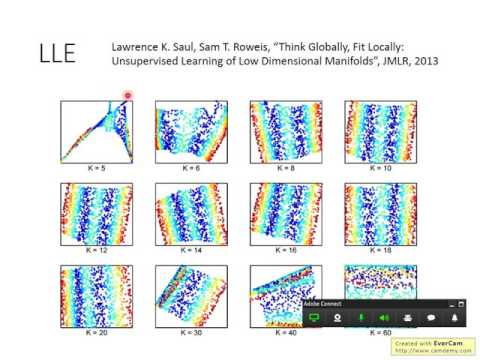

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('GBUEjkpoxXc')

# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
from sklearn import datasets
import time
%matplotlib inline

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(
    n_components=2, 
    random_state=9487, init='pca', 
    learning_rate=200., 
    early_exaggeration=12.)

In [4]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None, scale=True):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title: plt.title(title)
    plt.show()

Computing t-SNE embedding


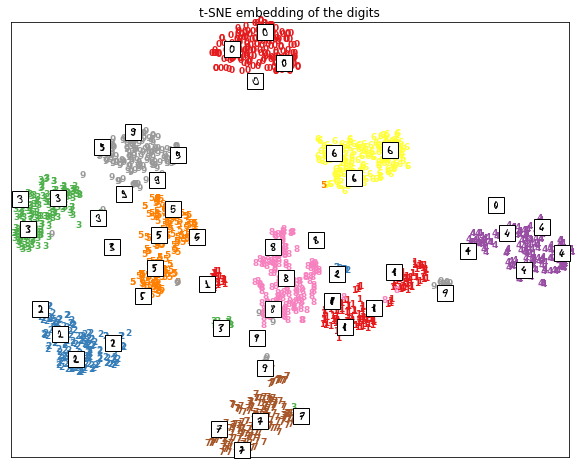

In [5]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

Computing PCA embedding


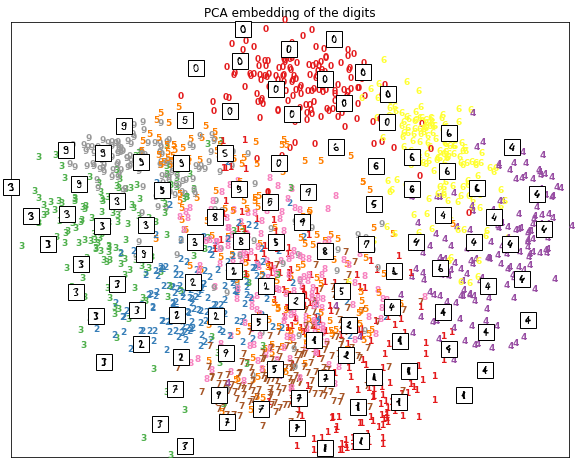

In [6]:
# PCA embedding of the digits dataset
print("Computing PCA embedding")

X_PCA = PCA(n_components=2).fit_transform(X)

plot_embedding(X_PCA,
               "PCA embedding of the digits")